In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
casas_df = pd.read_csv("kc_house_data.csv")
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [57]:
x = casas_df.drop(['price', 'date', 'id', 'lat', 'long'], axis = 1)
y = pd.DataFrame(casas_df["price"])

In [58]:
x['constant'] = 1

In [59]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [60]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,constant
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,1
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,1
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,1
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,1


In [61]:
y.shape

(21613, 1)

In [62]:
x.shape

(21613, 17)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
regresionLineal = LinearRegression()

regresionLineal.fit(x_train, y_train)

print("Intercepto:", regresionLineal.intercept_)
print("Coeficientes:", regresionLineal.coef_)

In [ ]:
print("Error cuadratico medio:", mean_squared_error(y_test, y_predict))
print("R2:", r2_score(y_test, y_predict))

Intercepto: [3143884.90386883]
Coeficientes: [[-3.46741841e+04  4.28686768e+04  1.04275444e+02 -1.70557274e-02
   2.92426886e+04  5.64191486e+05  4.13204269e+04  1.88425181e+04
   1.19000626e+05  4.98213870e+01  5.44540566e+01 -3.48481319e+03
   1.35605644e+01  2.94748898e+01  2.42797751e+01 -4.88208779e-01
   0.00000000e+00]]
Error cuadratico medio: 53996358220.557144
R2: 0.6540254540117221


In [71]:
y_predict = regresionLineal.predict(x_test)

<Axes: >

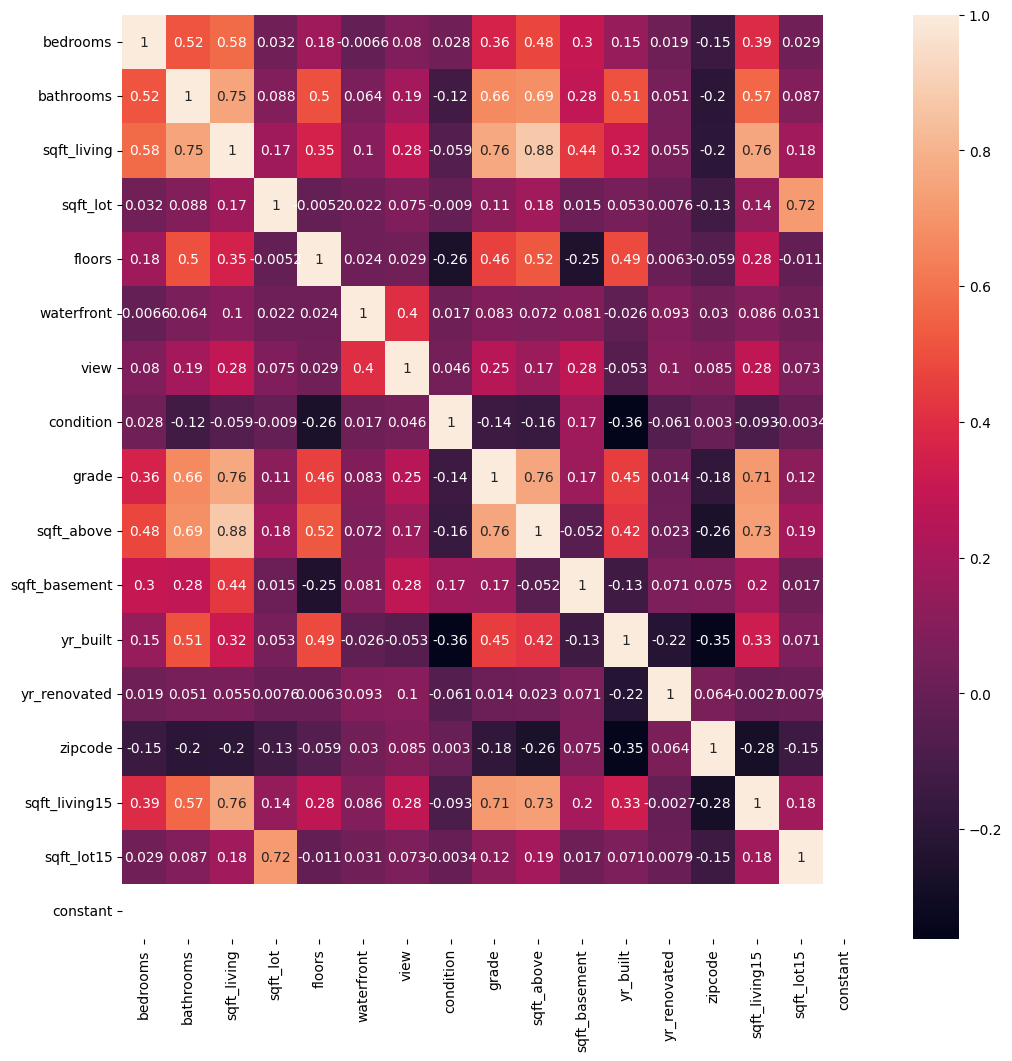

In [83]:
plt.figure(figsize = (12,12))
sns.heatmap(x.corr(), annot=True)

In [85]:
import statsmodels.api as sm

# Ajustar el modelo con statsmodels
modelo_sm = sm.OLS(y_train, x_train).fit()

# Mostrar los p-values
print(modelo_sm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1894.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        15:01:34   Log-Likelihood:            -2.0679e+05
No. Observations:               15129   AIC:                         4.136e+05
Df Residuals:                   15113   BIC:                         4.137e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.467e+04   2314.939    -14.978

In [96]:
x2 = casas_df.drop(['price', 'date', 'id', 'lat', 'long', 'sqft_lot', 'zipcode'], axis = 1)
y2 =  pd.DataFrame(casas_df["price"])
x2['constant'] = 1 

In [97]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.30, random_state=1)

In [104]:
regresionLineal_2 = LinearRegression()

regresionLineal_2.fit(x_train_2, y_train_2)

print("Intercepto:", regresionLineal_2.intercept_)
print("Coeficientes:", regresionLineal_2.coef_)

Intercepto: [6077159.09093097]
Coeficientes: [[-3.47669900e+04  4.28121080e+04  1.04328474e+02  2.99116978e+04
   5.64014999e+05  4.15284839e+04  1.85211354e+04  1.19154716e+05
   4.95055286e+01  5.48229455e+01 -3.50600596e+03  1.33720960e+01
   2.37888922e+01 -5.10966525e-01  0.00000000e+00]]


In [99]:
y_predict_2 = regresionLineal_2.predict(x_test_2)

In [103]:
print("Error cuadratico medio:", mean_squared_error(y_test_2, y_predict_2))
print("R2:", r2_score(y_test_2, y_predict_2))

Error cuadratico medio: 53981282489.44478
R2: 0.6541220497711201


In [102]:
# Ajustar el modelo con statsmodels
modelo_sm = sm.OLS(y_train_2, x_train_2).fit()

# Mostrar los p-values
print(modelo_sm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2185.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        15:08:41   Log-Likelihood:            -2.0679e+05
No. Observations:               15129   AIC:                         4.136e+05
Df Residuals:                   15115   BIC:                         4.137e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.477e+04   2310.426    -15.048

### De R2: 0.6540 mejoró a R2: 0.6541, casi un 0.01% esto quiere decir que no hubo un cambio significativo por quitar las variables con p-value mayor a 5%, esto podría mejorar ciertamente si se quitan los valores con multicolinealidad, esto podría ser excluyendo variables como sqrt above o grade, pero esto es par aotra lección. 